[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
Number of elements in G: 10000
Number of zero elements in G: 9703
Percentage of zero elements in G: 97.03%


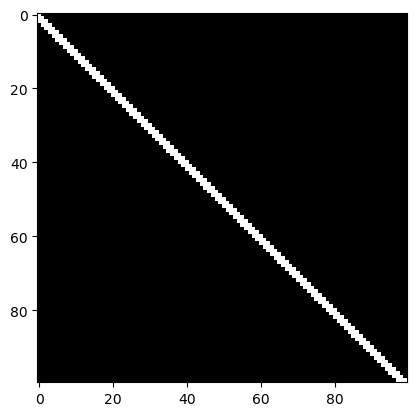

In [1]:
# Homework 1A	Suppose that you determine the masses of 100 objects by weighing the first, then weighing the first and
# second together, and then weighing the rest in triplets: the first, second, and third; the second, third, and
# fourth; and so forth. (A) Identify the data and model parameters in this problem. How many parameters of
# each are there? (B) Write down the matrix G in the form d= Gm that relates the data to the model
# parameters. (C) How many elements does the matrix has and what percentage of elements are zero, i.e. how
# sparse is G?

import numpy as np
import scipy.linalg as la    
import matplotlib.pyplot as plt

# Create a 100x100 matrix initialized with zeros.
# First measurement: only the first mass
# Second measurement: first and second masses
# Measurements 3 to 100: triplet measurements.

G = np.zeros((100, 100))
G[0, 0] = 1
G[1, 0:2] = 1
for i in range(2, 100):
    G[i, i-2:i+1] = 1

print(G)
plt.imshow(G, cmap='gray', interpolation='nearest')
number_of_elements = G.size
print(f'Number of elements in G: {number_of_elements}')

# Count the number of zero elements in the matrix G
number_of_zeros = np.count_nonzero(G == 0)
print(f'Number of zero elements in G: {number_of_zeros}')

# Calculate the percentage of zero elements
percentage_of_zeros = (number_of_zeros / number_of_elements) * 100
print(f'Percentage of zero elements in G: {percentage_of_zeros:.2f}%')


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Number of elements in G: 10000
Data vector for m containing 1 s: [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

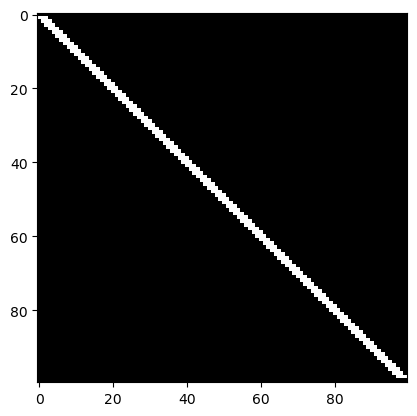

In [3]:
# Homework 1B.	 Let the data d be the running average of the model parameters, m, computed by averaging groups of
# three neighboring points; that is, di = (mi-1 + mi + mi+1)/3. (A) What is the matrix G in the equation d=Gm
# in this case? (B) What problems arise at the top and bottom rows of the matrix and how can you deal with
# them?

%reset -f
import numpy as np
import matplotlib.pyplot as plt

# Initialize the G matrix with zeros
G = np.zeros((100, 100))

# Fill the interior points
for i in range(1, 100-1):
    G[i, i-1] = 1/3
    G[i, i] = 1/3
    G[i, i+1] = 1/3


print(G)
plt.imshow(G, cmap='gray', interpolation='nearest')
number_of_elements = G.size
print(f'Number of elements in G: {number_of_elements}')

m = np.full((100,), 1)
d = G @ m
print(f'Data vector for m containing 1 s: {d}')

print(d)

print(f'Given that the equation does not work for the first and last element, we set G to zero for the first and last row')
